In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("Asansol-1.csv")


In [3]:
df

,Unnamed: 0,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M,WS2M
0,0,17.39,1.0,1,1,2011,67.88,305.38,2.86
1,1,14.85,1.0,2,1,2011,53.94,298.12,2.09
2,2,13.90,1.0,3,1,2011,52.94,336.19,2.06
3,3,13.55,1.0,4,1,2011,54.62,336.62,2.09
4,4,13.43,1.0,5,1,2011,51.69,331.62,2.03
...,...,...,...,...,...,...,...,...,...
3738,3738,28.98,1.0,27,3,2021,26.44,231.75,1.18
3739,3739,29.47,1.0,28,3,2021,34.94,160.88,0.81
3740,3740,30.12,1.0,29,3,2021,41.94,234.62,1.84
3741,3741,31.78,1.0,30,3,2021,26.31,262.12,2.63


In [4]:
d=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df=d.copy()

In [6]:
X = df.drop(["PRECTOTCORR", "DY","MO","YEAR","RH2M","WS2M",'WD50M'], axis=1)
Y = df["PRECTOTCORR"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [8]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.24988046])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


T2M    0.24988
dtype: float64

<AxesSubplot:>

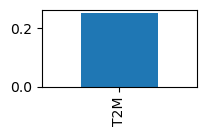

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(2, 1))


In [11]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))


The number of classes before fit Counter({0.0: 1749, 1.0: 1245})
The number of classes after fit Counter({1.0: 1749, 0.0: 1749})


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)


LogisticRegression()

In [13]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[387  51]
 [ 59 252]]
0.8531375166889186
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       438
         1.0       0.83      0.81      0.82       311

    accuracy                           0.85       749
   macro avg       0.85      0.85      0.85       749
weighted avg       0.85      0.85      0.85       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8469255164515701

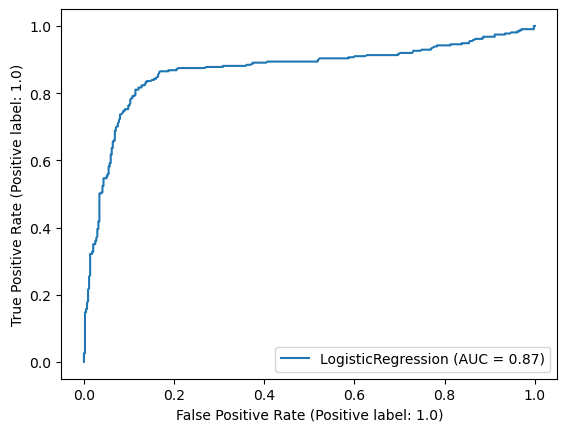

In [14]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)


In [15]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [16]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[391  47]
 [ 66 245]]
0.8491321762349799
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       438
         1.0       0.84      0.79      0.81       311

    accuracy                           0.85       749
   macro avg       0.85      0.84      0.84       749
weighted avg       0.85      0.85      0.85       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8402377072046278

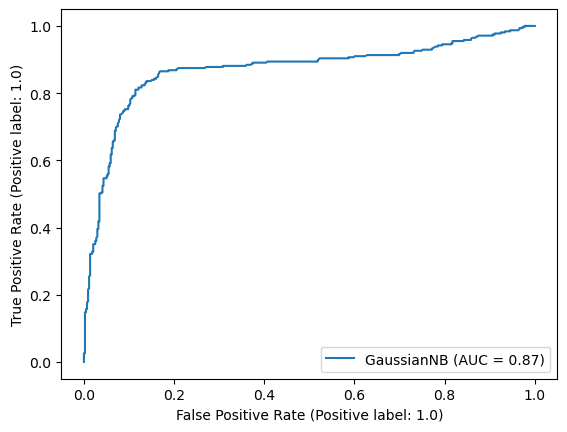

In [17]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)


In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[359  79]
 [ 61 250]]
0.8130841121495327
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84       438
         1.0       0.76      0.80      0.78       311

    accuracy                           0.81       749
   macro avg       0.81      0.81      0.81       749
weighted avg       0.82      0.81      0.81       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
from sklearn.metrics import RocCurveDisplay

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8117466120483342

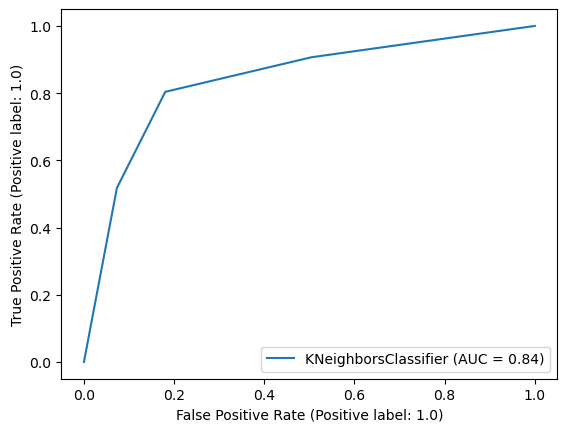

In [21]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)


In [22]:
svc = SVC()


In [23]:
svc.fit(X_train_res, y_train_res)


SVC()

In [24]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[387  51]
 [ 56 255]]
0.8571428571428571
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       438
         1.0       0.83      0.82      0.83       311

    accuracy                           0.86       749
   macro avg       0.85      0.85      0.85       749
weighted avg       0.86      0.86      0.86       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8517486675769722

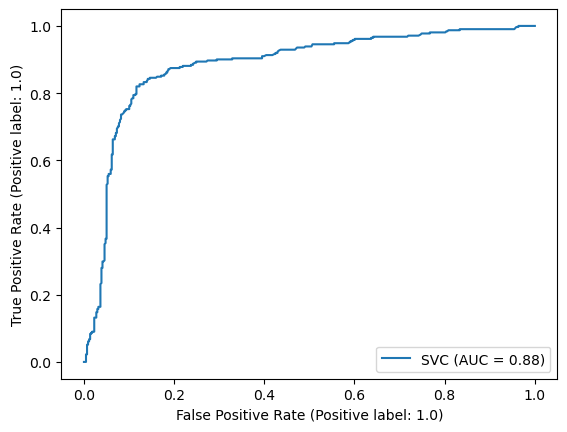

In [25]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None)


In [26]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred6 = bst.predict(X_test)

In [27]:
# y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[380  58]
 [ 52 259]]
0.8531375166889186
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87       438
         1.0       0.82      0.83      0.82       311

    accuracy                           0.85       749
   macro avg       0.85      0.85      0.85       749
weighted avg       0.85      0.85      0.85       749



In [28]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [29]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[350  88]
 [ 73 238]]
0.7850467289719626
              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81       438
         1.0       0.73      0.77      0.75       311

    accuracy                           0.79       749
   macro avg       0.78      0.78      0.78       749
weighted avg       0.79      0.79      0.79       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7821800349439869

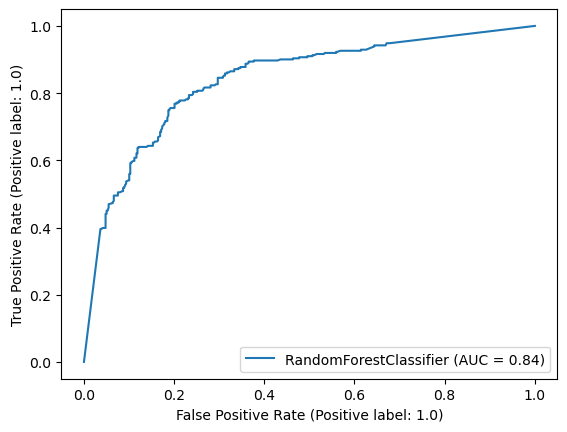

In [30]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)


In [31]:
cat = CatBoostClassifier(iterations=2000, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.009313
0:	total: 48ms	remaining: 1m 35s
1:	total: 48.9ms	remaining: 48.8s
2:	total: 49.8ms	remaining: 33.2s
3:	total: 50.7ms	remaining: 25.3s
4:	total: 51.6ms	remaining: 20.6s
5:	total: 52.5ms	remaining: 17.4s
6:	total: 53.4ms	remaining: 15.2s
7:	total: 54.2ms	remaining: 13.5s
8:	total: 55ms	remaining: 12.2s
9:	total: 56ms	remaining: 11.1s
10:	total: 56.9ms	remaining: 10.3s
11:	total: 57.8ms	remaining: 9.57s
12:	total: 58.7ms	remaining: 8.98s
13:	total: 59.7ms	remaining: 8.46s
14:	total: 60.6ms	remaining: 8.02s
15:	total: 61.6ms	remaining: 7.63s
16:	total: 62.4ms	remaining: 7.28s
17:	total: 63.3ms	remaining: 6.97s
18:	total: 64.2ms	remaining: 6.69s
19:	total: 65.1ms	remaining: 6.45s
20:	total: 66ms	remaining: 6.22s
21:	total: 66.9ms	remaining: 6.01s
22:	total: 67.7ms	remaining: 5.82s
23:	total: 68.6ms	remaining: 5.65s
24:	total: 69.5ms	remaining: 5.49s
25:	total: 70.4ms	remaining: 5.34s
26:	total: 71.3ms	remaining: 5.21s
27:	total: 72.2ms	remaining: 5.09s
28:	tot

In [32]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[376  62]
 [ 52 259]]
0.8477970627503337
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       438
         1.0       0.81      0.83      0.82       311

    accuracy                           0.85       749
   macro avg       0.84      0.85      0.84       749
weighted avg       0.85      0.85      0.85       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8456224581186039

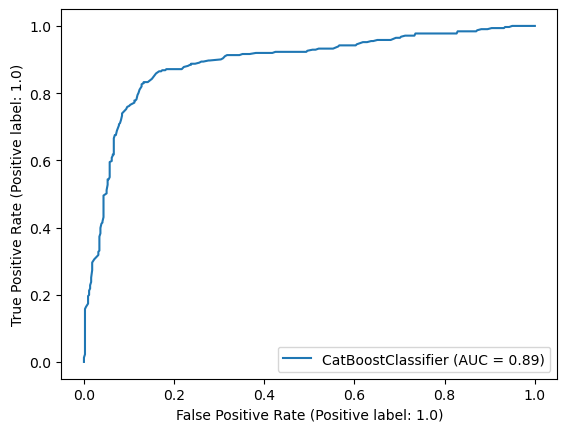

In [33]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [34]:
joblib.dump(rf, "rf.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(bst, "xgb.pkl")
joblib.dump(svc, "cat.pkl")

['cat.pkl']